### Unsupervised learning 


### clustering algorithms
1.) k-means clustering 

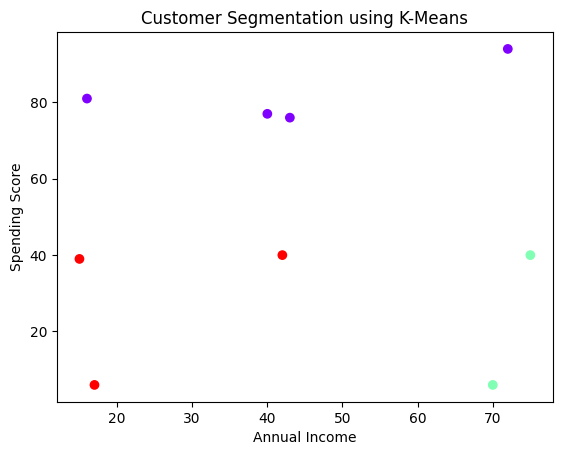

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

data = {'Annual Income (k$)': [15, 16, 17, 40, 42, 43, 70, 72, 75],
        'Spending Score (1-100)': [39, 81, 6, 77, 40, 76, 6, 94, 40]}
df = pd.DataFrame(data)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='rainbow')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Customer Segmentation using K-Means')
plt.show()


2.) Hierarchical clustering 

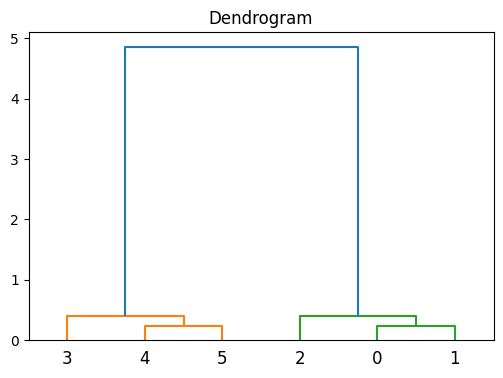

   Feature1  Feature2  Cluster_HC
0         4        20           1
1         5        21           1
2         6        19           2
3        15         5           0
4        16         7           0
5        17         6           0


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

df = pd.DataFrame({
    'Feature1': [4, 5, 6, 15, 16, 17],
    'Feature2': [20, 21, 19, 5, 7, 6]
})

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

plt.figure(figsize=(6, 4))
dendrogram = sch.dendrogram(sch.linkage(scaled_data, method='ward'))
plt.title("Dendrogram")
plt.show()

hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
df['Cluster_HC'] = hc.fit_predict(scaled_data)
print(df)


3.) DBSCAN (Density-Based Spatial Clustering)

   Feature1  Feature2  Cluster_DBSCAN
0         4        20               0
1         5        21               0
2         6        19               0
3        15         5               1
4        16         7               1
5        17         6               1


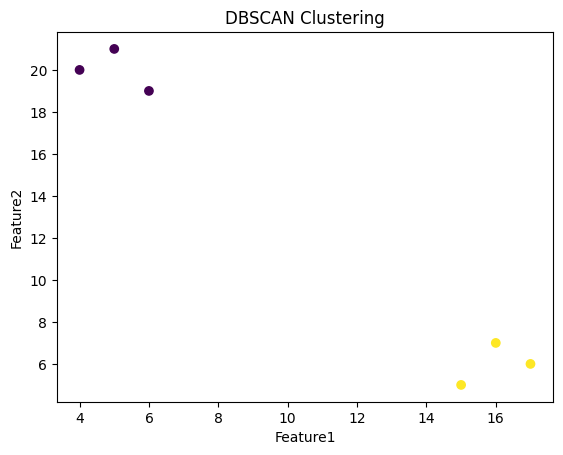

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

df = pd.DataFrame({
    'Feature1': [4, 5, 6, 15, 16, 17],
    'Feature2': [20, 21, 19, 5, 7, 6]
})

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

dbscan = DBSCAN(eps=1.2, min_samples=2)
df['Cluster_DBSCAN'] = dbscan.fit_predict(scaled_data)

print(df)

plt.scatter(df['Feature1'], df['Feature2'], c=df['Cluster_DBSCAN'], cmap='viridis')
plt.title("DBSCAN Clustering")
plt.xlabel("Feature1")
plt.ylabel("Feature2")
plt.show()


### Dimensionality Reduction Algorithms
1.) PCA (Principal Component Analysis)


   Feature1  Feature2  Cluster
0         4        20        2
1         5        21        2
2         6        19        0
3        15         5        1
4        16         7        1
5        17         6        1


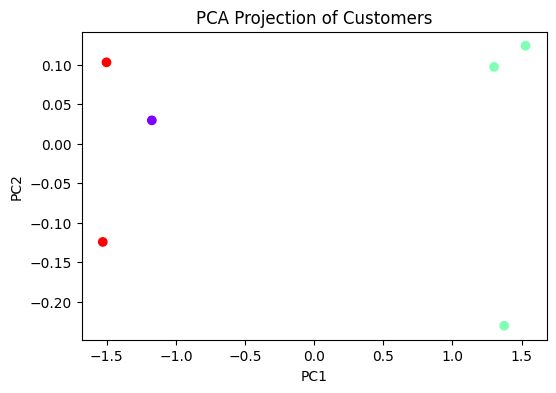

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

df = pd.DataFrame({
    'Feature1': [4, 5, 6, 15, 16, 17],
    'Feature2': [20, 21, 19, 5, 7, 6]
})

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
print(df)
plt.figure(figsize=(6, 4))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=df['Cluster'], cmap='rainbow')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Projection of Customers")
plt.show()


2.)  t-SNE (t-Distributed Stochastic Neighbor Embedding)


   Feature1  Feature2  Cluster
0         4        20        2
1         5        21        2
2         6        19        0
3        15         5        1
4        16         7        1
5        17         6        1


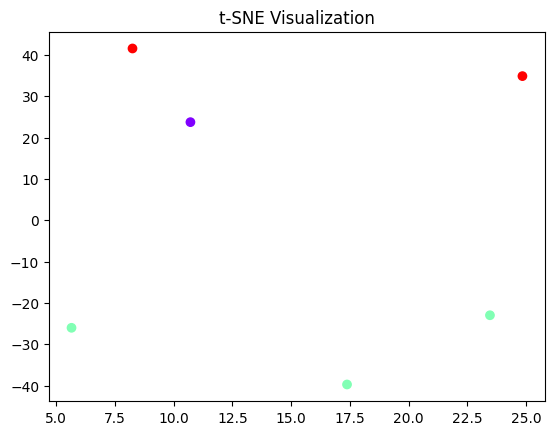

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

df = pd.DataFrame({
    'Feature1': [4, 5, 6, 15, 16, 17],
    'Feature2': [20, 21, 19, 5, 7, 6]
})

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(scaled_data)

tsne = TSNE(n_components=2, random_state=42, perplexity=3)
tsne_data = tsne.fit_transform(scaled_data)
print(df)
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=df['Cluster'], cmap='rainbow')
plt.title("t-SNE Visualization")
plt.show()
